In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score,KFold,cross_validate,train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier  
from sklearn.cluster import KMeans
from datetime import datetime
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

import plotly.graph_objs as go#visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
init_notebook_mode(connected=True)

import eli5
from scipy import hstack
from scipy.sparse import csr_matrix

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('20170504_test_download.csv', sep='\t',error_bad_lines=False)

In [4]:
df.shape

(84130, 161)

In [7]:
pandas_profiling.ProfileReport(df.sample(1000))

In [8]:
df.drop_duplicates(subset=df.columns).shape

(84130, 161)

In [9]:
df.head()

,account_id,client_id,time_msw,test_cr_decision,test_cr_performance,dep_var,month_verif,var1,var2,var3,...,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154
0,Company2,211804,2016-09-01 00:11:59,RJC,NaN,NaN,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
1,Company2,211807,2016-09-01 00:19:46,APR,OK,0.0,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,7
2,Company2,211808,2016-09-01 00:25:44,RJC,NaN,NaN,201609,1.0,1,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
3,Company2,193611,2016-09-01 00:40:53,APR,OK,0.0,201609,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3
4,Company2,7233,2016-09-01 00:49:33,RJC,NaN,NaN,201609,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,3


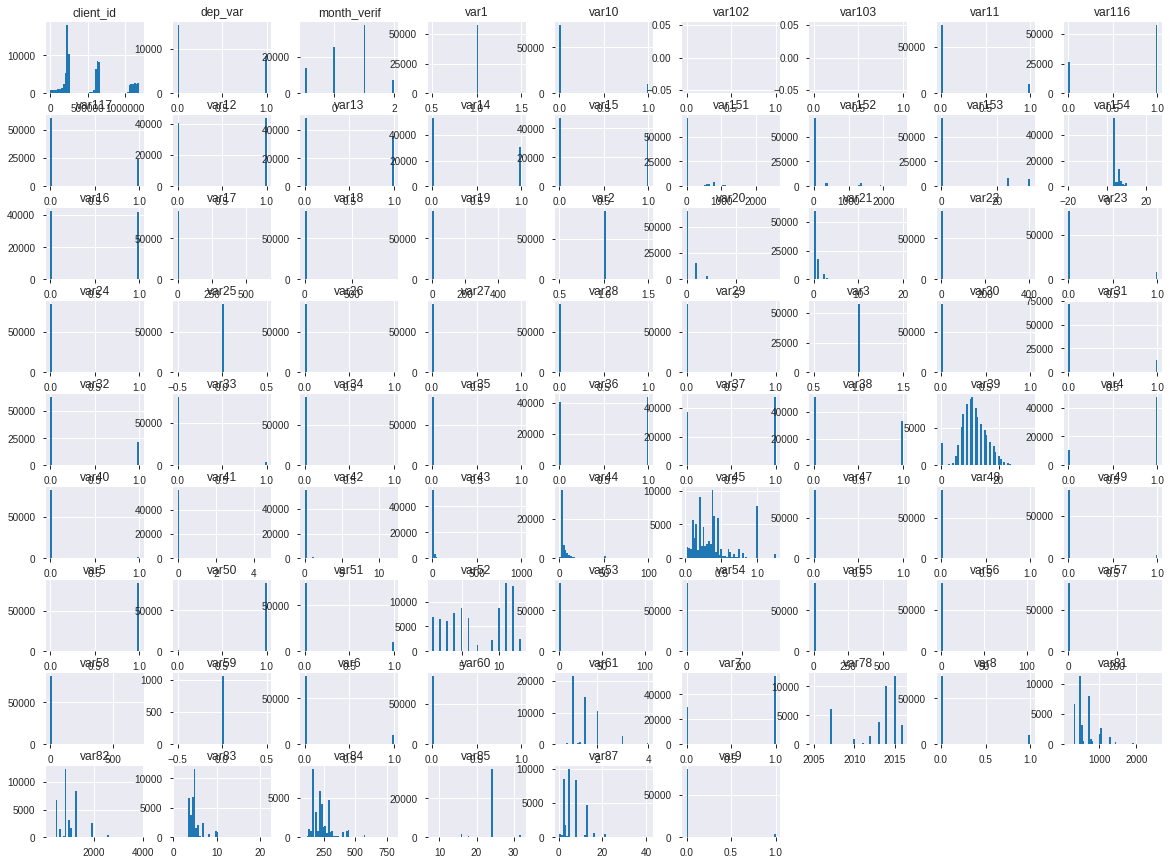

In [10]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
(df.isnull() == True).any().value_counts()

True     99
False    62
dtype: int64

In [14]:
for i in df.columns:
    print("Признак %s имеет %s уникальных значений" %(i,len(df[i].unique())))

Признак account_id имеет 3 уникальных значений
Признак client_id имеет 71455 уникальных значений
Признак time_msw имеет 79375 уникальных значений
Признак test_cr_decision имеет 2 уникальных значений
Признак test_cr_performance имеет 4 уникальных значений
Признак dep_var имеет 3 уникальных значений
Признак month_verif имеет 4 уникальных значений
Признак var1 имеет 2 уникальных значений
Признак var2 имеет 1 уникальных значений
Признак var3 имеет 2 уникальных значений
Признак var4 имеет 3 уникальных значений
Признак var5 имеет 2 уникальных значений
Признак var6 имеет 2 уникальных значений
Признак var7 имеет 2 уникальных значений
Признак var8 имеет 2 уникальных значений
Признак var9 имеет 2 уникальных значений
Признак var10 имеет 2 уникальных значений
Признак var11 имеет 2 уникальных значений
Признак var12 имеет 2 уникальных значений
Признак var13 имеет 2 уникальных значений
Признак var14 имеет 2 уникальных значений
Признак var15 имеет 2 уникальных значений
Признак var16 имеет 2 уникальных

In [15]:
for i in df.columns:
    if len(df[i].unique()) == 1:
        df = df.drop(columns=[i])

In [16]:
for i in df.columns:
    count_nan = df[i].isna().sum()
    print("В столбце %s: %s неизвестных (%s проц.)" %(i,count_nan,count_nan/df.shape[0]))

В столбце account_id: 0 неизвестных (0.0 проц.)
В столбце client_id: 0 неизвестных (0.0 проц.)
В столбце time_msw: 0 неизвестных (0.0 проц.)
В столбце test_cr_decision: 0 неизвестных (0.0 проц.)
В столбце test_cr_performance: 60679 неизвестных (0.7212528230120052 проц.)
В столбце dep_var: 60640 неизвестных (0.7207892547248306 проц.)
В столбце month_verif: 0 неизвестных (0.0 проц.)
В столбце var1: 26675 неизвестных (0.31706882206109593 проц.)
В столбце var3: 26675 неизвестных (0.31706882206109593 проц.)
В столбце var4: 26675 неизвестных (0.31706882206109593 проц.)
В столбце var5: 0 неизвестных (0.0 проц.)
В столбце var6: 0 неизвестных (0.0 проц.)
В столбце var7: 0 неизвестных (0.0 проц.)
В столбце var8: 0 неизвестных (0.0 проц.)
В столбце var9: 0 неизвестных (0.0 проц.)
В столбце var10: 0 неизвестных (0.0 проц.)
В столбце var11: 0 неизвестных (0.0 проц.)
В столбце var12: 0 неизвестных (0.0 проц.)
В столбце var13: 0 неизвестных (0.0 проц.)
В столбце var14: 0 неизвестных (0.0 проц.)
В сто

VAR151

In [18]:
df.var151.unique()

array([   0,  768,  900,  534,  480, 1080, 1024,  601,  640,  570,  600,
       1050,  568,  976,  960,  800, 1280,  720,  840,  667,  904,  864,
        731,  592, 1920,  732,  784, 1188, 1232,  962, 1184,  819, 1187,
        642,  854, 1200,  552,  657,  855,  750,  540,  801,  853, 1067,
        736,  569,  992,  671,  614,  595,  660,  782, 1138,  320, 1776,
        549, 2560,  427,  563,  808,  818,  945,  698,  360,  541,  912,
        697, 1440,  786,  347,  391,  598,  752,  762,  512,  490, 1000,
        888,  651,  521,  914,  533,  615,  857,  806, 1078, 1029, 1128,
       1824,  764, 1216,  745,  787,  522,  585,  559,  690, 1182, 1400,
        722,  858,  820,  591,  765,  931,  699,  553,  606,  547,  384,
        432,  831,  728, 1019,  961,  675,  635,  684,  627,  285, 1217,
        603,  638,  406,  551,  617,  492, 1205,  982,  530, 1208,  664,
        700,  712,  628, 1090,  964, 1105, 1152,  943, 1038,  753, 1812,
        971,  668,  986,  975])

In [19]:
df.dep_var.value_counts()

0.0    15177
1.0     8313
Name: dep_var, dtype: int64

In [20]:
len(df[df.dep_var.isna() == False ].index),len(df[df.dep_var.isna() == True ].index)

(23490, 60640)

In [21]:
ind = df[df.dep_var.isna() == False ].index

train = df.loc[ind]

In [22]:
((df.dtypes == object) == True).value_counts()

True     83
False    74
dtype: int64

In [23]:
object_feat = []
for col in train.columns:
    if (train[col].dtypes == object):
        object_feat.append(col)

Базовые модели

In [26]:
X = train.drop(columns=['dep_var'])
y = train.dep_var
holdout = df.loc[df[df.dep_var.isna() == True ].index]

In [27]:
X = X.fillna(0)

In [28]:
for i in object_feat:
    X[i] = pd.factorize(X[i])[0]

In [178]:
def cv_with_scale(data,target,list_scale):
    ss = StandardScaler()
    cv = KFold(random_state=17,n_splits=5,shuffle=True)
    cv_result = []
    for train_ind, val_ind in cv.split(data, target):
        X_train_ = data.iloc[train_ind]
        y_train_ = target.iloc[train_ind]
        X_val_ = data.iloc[val_ind]
        y_val_ = target.iloc[val_ind]
        
        for feat in list_scale:
            X_train_[feat] = ss.fit_transform(X_train_[feat].values.reshape(-1, 1))
            X_val_[feat] = ss.transform(X_val_[feat].values.reshape(-1, 1))
        
        model = LGBMClassifier(n_estimators=30,max_depth=4)
        model.fit(X_train_,y_train_)
        y_pred = model.predict_proba(X_val_)
        res = roc_auc_score(y_val_,y_pred)
        cv_result.append(res)
    return np.mean(cv_result)

In [174]:
def cv_meth(X, y, model,cv=5, scoring='roc_auc',fillna=0,transform=None):
    for i in object_feat:
        X[i] = pd.factorize(X[i])[0]
#     X = X.fillna(fillna)
    for col in X.columns:
        X[col] = X[col].fillna(fillna)
    if transform == None:
        cv_score = cross_val_score(model, X, y, cv=cv, scoring=scoring,n_jobs=-1) 
        cv_score = np.mean(cv_score)
    else:
        cv_score = cv_with_scale(X,y,transform)
    return cv_score

In [30]:
df_scores = pd.DataFrame(columns=['model','metric','score','parameters','commit','time','variables'])

In [31]:
# Spot Check Algorithms
models = []
models.append(('LC', LogisticRegression()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('GB' ,GradientBoostingClassifier()))
models.append(('LGBM',LGBMClassifier()))
models.append(('XGB', XGBClassifier()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=17)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s score:%f" % (name, cv_results.mean())
    df_scores = df_scores.append({'model':name,'score':cv_results.mean(), 'metric':'roc_auc',
                                  'parameters':'raw','commit':'base model from the box; determinate labels;',
                                  'time':datetime.now()}, ignore_index = True)
    print(msg)

LC score:0.613130
AdaBoostClassifier score:1.000000
KNN score:0.535019
CART score:1.000000
RandomForest score:0.995560
GB score:1.000000
LGBM score:1.000000
XGB score:1.000000


In [32]:
clf = RandomForestClassifier()

In [33]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

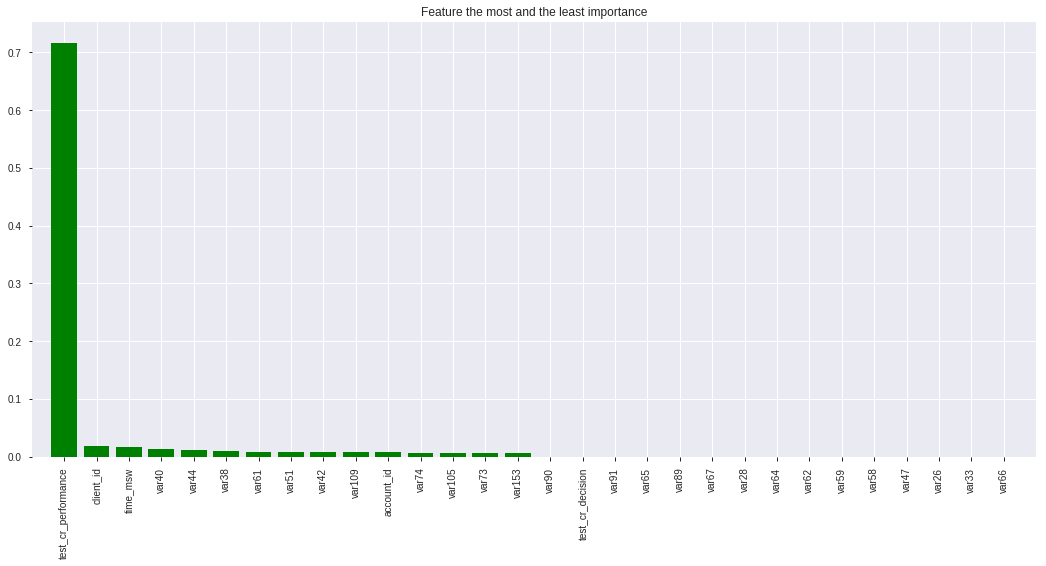

In [34]:
feat_names = df.columns
importances = clf.feature_importances_
# indices = np.argsort(importances)
indices = np.concatenate([np.argsort(importances)[::-1][:15],np.argsort(importances)[::-1][-15:]])

plt.figure(figsize=(18,8))
plt.title("Feature the most and the least importance")
plt.bar(range(len(indices)), importances[indices], color="g", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

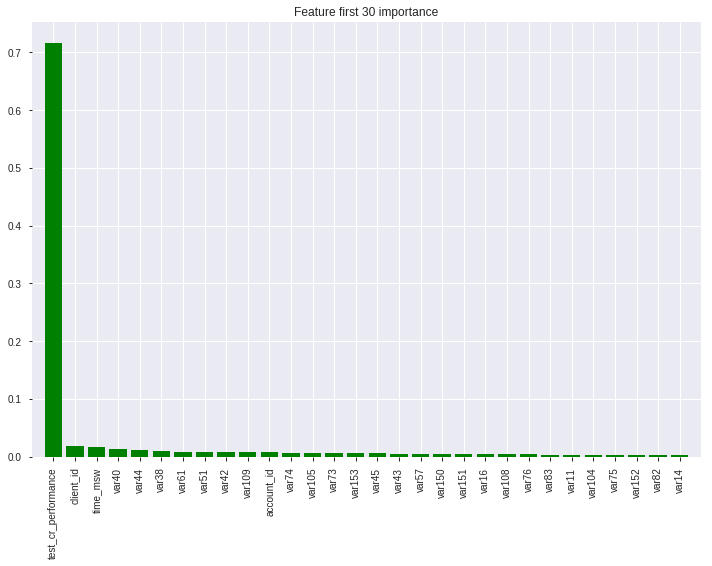

In [35]:
less_important = np.argsort(importances)[::-1][:30]
plt.figure(figsize=(12,8))
plt.title("Feature first 30 importance")
plt.bar(range(len(less_important)), importances[less_important], color="g", align="center")
plt.xticks(range(len(less_important)), feat_names[less_important], rotation='vertical')
plt.xlim([-1, len(less_important)])
plt.show()

The most important feature

In [42]:
df.test_cr_performance.value_counts()

OK        14532
NPL90+     8313
NPL90-      606
Name: test_cr_performance, dtype: int64

In [43]:
cr_performance_feat = train.test_cr_performance.unique()

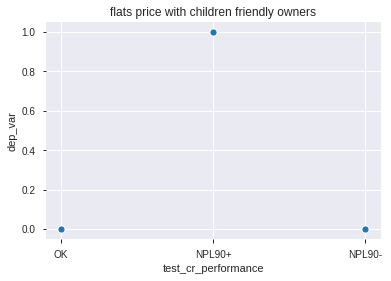

In [44]:
sns.scatterplot(x='test_cr_performance', y='dep_var', data=df);
plt.title('flats price with children friendly owners');

In [45]:
clf1 = RandomForestClassifier()
cv_score1 = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
print(np.mean(cv_score1))

0.9960594418414098


In [46]:
df_scores = df_scores.append({'model':clf,'score':np.mean(cv_score1), 'metric':'roc_auc',
                              'parameters':'raw',
                              'commit':'RF for features impotance; CV 5 folds; determinate labels',
                              'time':datetime.now(),
                             'variables':'clf1,cv_score1'}, ignore_index = True)

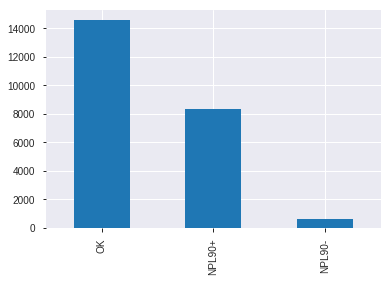

In [47]:
df['test_cr_performance'].value_counts().plot(kind='bar')

In [48]:
pd.crosstab(df['dep_var'], df['test_cr_performance'], margins=True)

test_cr_performance,NPL90+,NPL90-,OK,All
dep_var,,,,
0.0,0,606,14532,15138
1.0,8313,0,0,8313
All,8313,606,14532,23451


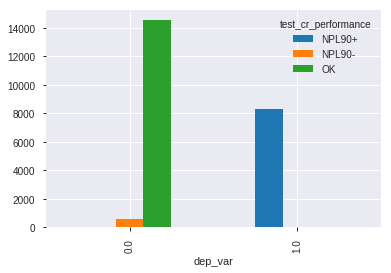

In [49]:
pd.crosstab(df['dep_var'], df['test_cr_performance']).plot(kind='bar')

In [50]:
pd.crosstab(train['dep_var'], train['test_cr_performance'], margins=True)

test_cr_performance,NPL90+,NPL90-,OK,All
dep_var,,,,
0.0,0,606,14532,15138
1.0,8313,0,0,8313
All,8313,606,14532,23451


Фича test_cr_performance дублирует таргет. Для фичей без таргета test_cr_performance не определена. 

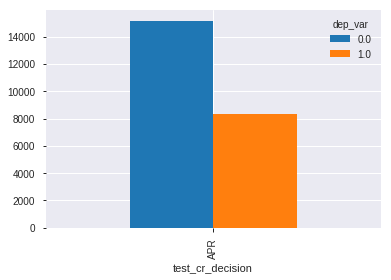

In [51]:
pd.crosstab(df['test_cr_decision'],df['dep_var']).plot(kind='bar')

In [52]:
df.test_cr_decision.value_counts()

RJC    60640
APR    23490
Name: test_cr_decision, dtype: int64

In [53]:
train.test_cr_decision.value_counts()

APR    23490
Name: test_cr_decision, dtype: int64

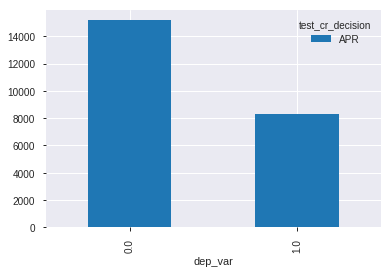

In [54]:
pd.crosstab(train['dep_var'], train['test_cr_decision']).plot(kind='bar')

In [55]:
pd.crosstab(train['dep_var'], train['test_cr_decision'], margins=True)

test_cr_decision,APR,All
dep_var,,
0.0,15177,15177
1.0,8313,8313
All,23490,23490


In [105]:
train = train.drop(columns=['test_cr_performance'])

In [79]:
object_feat.remove('test_cr_performance')

In [106]:
train = train.drop(columns=['test_cr_decision'])

In [83]:
object_feat.remove('test_cr_decision')

In [107]:
train2 = train

In [85]:
cv_score8 = cv_meth(train, y, LGBMClassifier(), cv=5, scoring='roc_auc')
print('ROC-AUC:',np.mean(cv_score8))

ROC-AUC: 1.0


In [86]:
df_scores = df_scores.append({'model':LGBMClassifier,'score':np.mean(cv_score8), 'metric':'roc_auc',
                              'parameters':'raw',
                              'commit':'CV 5 folds; determinate labels; drop test_cr_performance, test_cr_decision',
                              'time':datetime.now(),
                             'variables':'train2'}, ignore_index = True)

In [97]:
scores_lgbm = []
for j in range(10,201,10):
    score = cv_meth(train2.drop(columns=['dep_var']),y,LGBMClassifier(n_estimators=j),cv=kfold, scoring='roc_auc')
    scores_lgbm.append(score)

In [98]:
trace1 = go.Scatter(
    x=[i for i in range(10,201,10)],
    y=scores_lgbm
)
data = [trace1]
layout = go.Layout(title = 'Кривая валидации по подбору кол-ва деревьев LGBM',
          yaxis={'title':'roc-auc'}, xaxis={'title':'Кол-во'})

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [109]:
scores_lgbm_dep = []
for j in range(20):
    score = cv_meth(train2.drop(columns=['dep_var']),y,LGBMClassifier(n_estimators=30,max_depth=j),cv=kfold, scoring='roc_auc')
    scores_lgbm_dep.append(score)

In [110]:
trace1 = go.Scatter(
    x=[i for i in range(20)],
    y=scores_lgbm_dep
)
data = [trace1]
layout = go.Layout(title = 'Кривая валидации по подбору глубины дерева LGBM',
          yaxis={'title':'roc-auc'}, xaxis={'title':'Глубина деревьев'})

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [111]:
scores_xgb = []
for j in range(10,201,10):
    score = cv_meth(train2.drop(columns=['dep_var']),y,XGBClassifier(n_estimators=j),cv=kfold, scoring='roc_auc')
    scores_xgb.append(score)

In [112]:
trace1 = go.Scatter(
    x=[i for i in range(10,201,10)],
    y=scores_xgb
)
data = [trace1]
layout = go.Layout(title = 'Кривая валидации по подбору кол-ва деревьев XGB',
          yaxis={'title':'roc-auc'}, xaxis={'title':'Глубина деревьев'})

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [113]:
# range_C = list(np.linspace(0.1,1,10)) + list(range(2, 10))
range_C = [0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.7,0.9]
scores_lg_c = []
for j in range_C:
    score = cv_meth(train2.drop(columns=['dep_var']),y,LogisticRegression(C=j),cv=kfold, scoring='roc_auc')
    scores_lg_c.append(score)

In [115]:
trace1 = go.Scatter(
    x=range_C,
    y=scores_lg_c
)
data = [trace1]
layout = go.Layout(title = 'Кривая валидации по подбору C LogC',
          yaxis={'title':'roc-auc'}, xaxis={'title':'C'})

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [118]:
train.head()

,account_id,client_id,time_msw,dep_var,month_verif,var1,var3,var4,var5,var6,...,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154
1,0,211807,0,0.0,201609,1.0,1.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,7
3,0,193611,1,0.0,201609,NaN,NaN,NaN,1,0,...,0,0,0,0,0,0,0,0,0,3
10,0,211812,2,0.0,201609,1.0,1.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,3
11,0,211814,3,0.0,201609,1.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,0,3
13,0,56232,4,0.0,201609,1.0,1.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,3


In [119]:
cv_score3 = cross_val_score(LGBMClassifier(n_estimators=30,max_depth=4), train.drop(columns=['dep_var']), y, cv=7, scoring='roc_auc')
print('roc_auc:',np.mean(cv_score3))

roc_auc: 0.5187291383612566


In [120]:
train3 = train

In [121]:
df_scores = df_scores.append({'model':'LGBMClassifier','score':np.mean(cv_score3), 'metric':'roc_auc',
                              'parameters':'n_estimators=30,max_depth=4',
                              'commit':'CV 5 folds; determinate labels; drop test_cr_decision',
                              'time':datetime.now(),
                             'variables':'train3,cv_score3'}, ignore_index = True)

In [122]:
cv_score4 = cv_meth(train.drop(columns=['dep_var']), y,LogisticRegression(C=0.9), cv=7, scoring='roc_auc')
print('roc_auc:',np.mean(cv_score4))

roc_auc: 0.6203912650191047


In [123]:
df_scores = df_scores.append({'model':'LogisticRegression','score':np.mean(cv_score4), 'metric':'roc_auc',
                              'parameters':'C=0.9',
                              'commit':'CV 5 folds; determinate labels; drop test_cr_decision',
                              'time':datetime.now(),
                             'variables':'train3,cv_score4'}, ignore_index = True)

Logistic Regression

In [ ]:
# LR = LogisticRegression()

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(LR, X, y, scoring=scoring, cv=20)

# sorted(scores.keys())
# LR_fit_time = scores['fit_time'].mean()
# LR_score_time = scores['score_time'].mean()
# LR_accuracy = scores['test_accuracy'].mean()
# LR_precision = scores['test_precision_macro'].mean()
# LR_recall = scores['test_recall_macro'].mean()
# LR_f1 = scores['test_f1_weighted'].mean()
# LR_roc = scores['test_roc_auc'].mean()

Decision Tree Classifier

In [ ]:
# decision_tree = DecisionTreeClassifier()

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(decision_tree, X, y, scoring=scoring, cv=20)

# sorted(scores.keys())
# dtree_fit_time = scores['fit_time'].mean()
# dtree_score_time = scores['score_time'].mean()
# dtree_accuracy = scores['test_accuracy'].mean()
# dtree_precision = scores['test_precision_macro'].mean()
# dtree_recall = scores['test_recall_macro'].mean()
# dtree_f1 = scores['test_f1_weighted'].mean()
# dtree_roc = scores['test_roc_auc'].mean()

Support Vector Machine

In [ ]:
# SVM = SVC(probability = True)

# scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(SVM, X, y, scoring=scoring, cv=20)

# sorted(scores.keys())
# SVM_fit_time = scores['fit_time'].mean()
# SVM_score_time = scores['score_time'].mean()
# SVM_accuracy = scores['test_accuracy'].mean()
# SVM_precision = scores['test_precision_macro'].mean()
# SVM_recall = scores['test_recall_macro'].mean()
# SVM_f1 = scores['test_f1_weighted'].mean()
# SVM_roc = scores['test_roc_auc'].mean()

Random Forest Classifier

In [ ]:
# random_forest = RandomForestClassifier()

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(random_forest, X, y, scoring=scoring, cv=20)

# sorted(scores.keys())
# forest_fit_time = scores['fit_time'].mean()
# forest_score_time = scores['score_time'].mean()
# forest_accuracy = scores['test_accuracy'].mean()
# forest_precision = scores['test_precision_macro'].mean()
# forest_recall = scores['test_recall_macro'].mean()
# forest_f1 = scores['test_f1_weighted'].mean()
# forest_roc = scores['test_roc_auc'].mean()

K-Nearest Neighbors

In [ ]:
# KNN = KNeighborsClassifier()

# scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
# scores = cross_validate(KNN, X, y, scoring=scoring, cv=20)

# sorted(scores.keys())
# KNN_fit_time = scores['fit_time'].mean()
# KNN_score_time = scores['score_time'].mean()
# KNN_accuracy = scores['test_accuracy'].mean()
# KNN_precision = scores['test_precision_macro'].mean()
# KNN_recall = scores['test_recall_macro'].mean()
# KNN_f1 = scores['test_f1_weighted'].mean()
# KNN_roc = scores['test_roc_auc'].mean()

In [ ]:
# models_initial = pd.DataFrame({
#     'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'K-Nearest Neighbors'],
#     'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, forest_fit_time, KNN_fit_time],
#     'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, forest_score_time, KNN_score_time],
#     'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, forest_accuracy, KNN_accuracy],
#     'Precision'   : [LR_precision, dtree_precision, SVM_precision, forest_precision, KNN_precision],
#     'Recall'      : [LR_recall, dtree_recall, SVM_recall, forest_recall, KNN_recall],
#     'F1_score'    : [LR_f1, dtree_f1, SVM_f1, forest_f1, KNN_f1],
#     'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, forest_roc, KNN_roc],
#     }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

# models_initial.sort_values(by='Accuracy', ascending=False)

Time

In [124]:
train.head()

,account_id,client_id,time_msw,dep_var,month_verif,var1,var3,var4,var5,var6,...,var145,var146,var147,var148,var149,var150,var151,var152,var153,var154
1,0,211807,0,0.0,201609,1.0,1.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,7
3,0,193611,1,0.0,201609,NaN,NaN,NaN,1,0,...,0,0,0,0,0,0,0,0,0,3
10,0,211812,2,0.0,201609,1.0,1.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,3
11,0,211814,3,0.0,201609,1.0,1.0,1.0,1,1,...,0,0,0,0,0,0,0,0,0,3
13,0,56232,4,0.0,201609,1.0,1.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,3


Train

In [125]:
train.time_msw = pd.to_datetime(train.time_msw)
train['start_time_s'] = train['time_msw'].apply(lambda ts: 
                                                      10000 * ts.hour + ts.minute*100 + ts.second).astype('int')
train['month_verif'] = train['time_msw'].apply(lambda ts:ts.month).astype('int')
train['hour'] = train['time_msw'].apply(lambda ts:ts.hour).astype('int')
train = train.drop(columns=['time_msw'])
train = train.drop(columns=['month_verif'])

In [126]:
object_feat.remove('time_msw')

In [127]:
cv_score5 = cv_meth(train.drop(columns=['dep_var']), y,LGBMClassifier(n_estimators=30,max_depth=4), cv=7, scoring='roc_auc')
print('roc_auc:',np.mean(cv_score5))

roc_auc: 0.5130055714056004


In [128]:
train5 = train

In [129]:
df_scores = df_scores.append({'model':'LGBMClassifier','score':np.mean(cv_score5), 'metric':'roc_auc',
                              'parameters':'n_estimators=30,max_depth=4',
                              'commit':'CV 5 folds; determinate labels; test_cr_performance, drop test_cr_decision; time features',
                              'time':datetime.now(),
                              'variables':'train5,cv_score5'},ignore_index = True)

VAR73

In [130]:
train.var73.value_counts()

0    12698
1     9234
2     1380
3      158
4        9
7        7
5        3
6        1
Name: var73, dtype: int64

In [131]:
clf = LGBMClassifier(n_estimators=30,max_depth=4)

In [132]:
X = train.drop(columns=['dep_var'])
object_feat = []
for col in train.columns:
    if (train[col].dtypes == object):
        object_feat.append(col)
for i in object_feat:
    X[i] = pd.factorize(X[i])[0]
clf.fit(X.fillna(-1),y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=4,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=30, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [133]:
X.shape, len(importances)

((23490, 154), 156)

In [134]:
weights = pd.DataFrame(columns=['name','weight'])
weights['name'] = X.columns
weights['weight'] = clf.feature_importances_

In [135]:
weights.sort_values(by='weight',ascending=False)[:20]

,name,weight
44,var45,54
1,client_id,40
38,var39,38
73,var74,33
40,var41,24
151,var154,21
107,var110,12
148,var151,12
17,var17,11
102,var105,11


In [136]:
eli5.show_weights(clf, top=10,
                  feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.3028,client_id
0.1240,var45
0.1051,var152
0.0828,var74
0.0552,var39
0.0410,var41
0.0269,var154
0.0249,var13
0.0197,var151
0.0189,var109


In [137]:
len(train.var74.unique())

149

In [138]:
pd.crosstab(df['dep_var'], df['var74'])

var74,AG Neovo,AOL,AT&T,Acer,Adcom,Advan,Advent,Alcatel,Amazon,Apple,...,Wileyfox,Xiaomi,Yandex,Yota Devices,Yuntab,ZTE,Zifro,bq,iNew,iView
dep_var,,,,,,,,,,,,,,,,,,,,,
0.0,1,78,1,10,2,0,6,228,0,1690,...,8,84,2279,1,0,242,0,2,0,1
1.0,1,63,1,6,2,2,4,220,1,605,...,5,18,1435,0,2,243,1,4,1,1


In [139]:
top_var74 = train.var74.value_counts().head(40).index

In [140]:
for v in top_var74:
    train['var74_' + str(v).replace(' ','')] = train['var74'].apply(lambda x: 1 if str(v) in str(x) else 0)

In [141]:
train.head()

,account_id,client_id,dep_var,var1,var3,var4,var5,var6,var7,var8,...,var74_36,var74_18,var74_27,var74_41,var74_72,var74_29,var74_34,var74_23,var74_37,var74_49
1,0,211807,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,193611,0.0,NaN,NaN,NaN,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,0,211812,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,0,211814,0.0,1.0,1.0,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13,0,56232,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
train = train.drop(columns=['var74'])

In [143]:
cv_score6 = cv_meth(train.drop(columns=['dep_var']),y,model=LGBMClassifier(n_estimators=30,max_depth=4),fillna=-1)

In [144]:
train6 = train

In [145]:
df_scores = df_scores.append({'model':'LGBMClassifier','score':np.mean(cv_score6), 'metric':'roc_auc',
                              'parameters':'n_estimators=30,max_depth=4',
                              'commit':'CV 5 folds; determinate labels; test_cr_performance, drop test_cr_decision; time features; var74; fillna=-1',
                              'time':datetime.now(),
                              'variables':'train6,cv_score6'},ignore_index = True)

In [146]:
train.head()

,account_id,client_id,dep_var,var1,var3,var4,var5,var6,var7,var8,...,var74_36,var74_18,var74_27,var74_41,var74_72,var74_29,var74_34,var74_23,var74_37,var74_49
1,0,211807,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,193611,0.0,NaN,NaN,NaN,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,0,211812,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,0,211814,0.0,1.0,1.0,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
13,0,56232,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


VAR41

In [147]:
train.var41.head()

1     19.0
3      NaN
10    35.0
11    75.0
13    22.0
Name: var41, dtype: float64

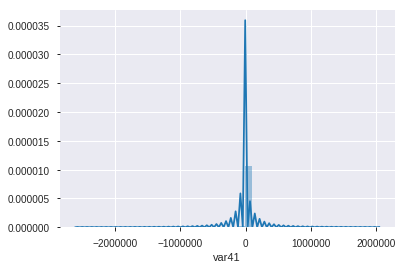

In [148]:
sns.distplot(train.var41.fillna(train.var41.sum()/train.shape[0]))

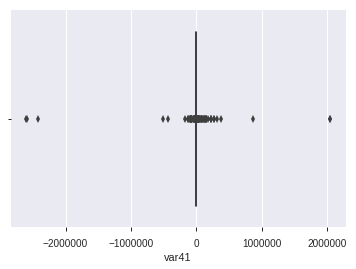

In [149]:
sns.boxplot(train.var41.fillna(train.var41.sum()/train.shape[0]))

In [185]:
ss =StandardScaler()
train.var41 = train.var41.fillna(train.var41.median()) 
scale_var41 = ss.fit_transform(train.var41.values.reshape(-1,1))

In [151]:
train.var41.sort_values().values[0],train.var41.sort_values().values[-1]

(-2606305.7024189997, 2045652.927521)

In [163]:
large_ind = np.concatenate( [train[(train.var41>2000000)].index,train[(train.var41<-2000000)].index])

In [161]:
test_train = train.drop(index=large_ind)

In [164]:
cv_score7_2 = cv_meth(test_train.drop(
    columns=['dep_var']),y.drop(index=large_ind),model=LGBMClassifier(n_estimators=30,max_depth=4),fillna=-1)
print(cv_score7_2)

0.5656101994976379


In [167]:
cv_score7_3 = cv_meth(test_train.drop(columns=['dep_var']),y.drop(
    index=large_ind),model=LGBMClassifier(n_estimators=30,max_depth=4),fillna=X[col].median())
print(cv_score7_3)

0.5656101994976379


In [183]:
cv_score7_4 = cv_with_scale(test_train,y.drop(index=large_ind),['var41'])

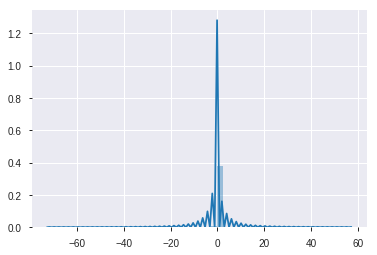

In [186]:
sns.distplot(scale_var41)

Categorical

In [187]:
train[object_feat] = train[object_feat].fillna('unknown')

In [188]:
for col in object_feat:
    print("Weight:",col,weights[weights['name'] == col]['weight'].values)

In [189]:
train.var46.value_counts()

0    9774
1    6122
2    3494
4    3070
3     812
5      88
6      80
7      44
8       5
9       1
Name: var46, dtype: int64

In [190]:
train.var46.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [191]:
vars46 = train.var46.unique()
for v in vars46:
    train['var46_' + str(v).replace(' ','')] = train['var46'].apply(lambda x: 1 if str(v) in str(x) else 0)

In [192]:
train = train.drop(columns=['var46','var41']);

In [193]:
cv_score7 = cv_meth(train.drop(columns=['dep_var']),y,model=LGBMClassifier(n_estimators=30,max_depth=4),fillna=-1)

In [194]:
train7 = train

In [195]:
df_scores = df_scores.append({'model':'LGBMClassifier','score':np.mean(cv_score7), 'metric':'roc_auc',
                              'parameters':'n_estimators=30,max_depth=4',
                              'commit':'CV 5 folds; determinate labels; test_cr_performance, drop test_cr_decision; time features; var74; fillna=-1; scale var46; var41',
                              'time':datetime.now(),
                              'variables':'train7,cv_score7'},ignore_index = True)

VAR62

In [197]:
train = train5

In [198]:
train.var119.value_counts()

0    13727
1     9762
2        1
Name: var119, dtype: int64

In [199]:
df.var119.value_counts()

t    35287
f        4
Name: var119, dtype: int64

In [200]:
df.var119.value_counts()

t    35287
f        4
Name: var119, dtype: int64

In [201]:
df.var119.unique()

array(['t', nan, 'f'], dtype=object)

In [202]:
weights[(weights.name == 'var119')]['weight']

116    0
Name: weight, dtype: int64

In [203]:
w_0_feat = weights[weights['weight'] == 0]['name'].values

In [204]:
df.var1.value_counts()

1.0    57455
Name: var1, dtype: int64

In [205]:
pd.crosstab(df['dep_var'], df['var3'], margins=True)

var3,1.0,All
dep_var,,
0.0,10492,10492
1.0,6721,6721
All,17213,17213


In [206]:
train9  = train.drop(columns=w_0_feat)

In [207]:
cv_score9 = cv_meth(train9.drop(columns=['dep_var']),y,LGBMClassifier(n_estimators=30,max_depth=4))

In [208]:
cv_score9

0.5667750120810959

In [209]:
df_scores = df_scores.append({'model':'LGBMClassifier','score':cv_score9, 'metric':'roc_auc',
                              'parameters':'n_estimators=30,max_depth=4',
                              'commit':'CV 5 folds; determinate labels; test_cr_performance, drop test_cr_decision; time features; var74; fillna=-1; scale var46; var41; drop feats with low weight',
                              'time':datetime.now(),
                              'variables':'train9,cv_score9'},ignore_index = True)

In [210]:
weights.sort_values(by='weight',ascending=False).head(10)

,name,weight
44,var45,54
1,client_id,40
38,var39,38
73,var74,33
40,var41,24
151,var154,21
107,var110,12
148,var151,12
17,var17,11
102,var105,11


Client_id

In [211]:
client_id_val = train.client_id.value_counts().to_dict()
train['client_id_num'] = train.client_id.apply(lambda x: client_id_val[x])

In [212]:
train10 = train

cv_score10 = cv_meth(train10.drop(columns=['dep_var']),y,LGBMClassifier(n_estimators=30,max_depth=4))

cv_score10

0.5980992765912385

In [213]:
train.head()

,account_id,client_id,dep_var,var1,var3,var4,var5,var6,var7,var8,...,var74_18,var74_27,var74_41,var74_72,var74_29,var74_34,var74_23,var74_37,var74_49,client_id_num
1,0,211807,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,193611,0.0,NaN,NaN,NaN,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10,0,211812,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2
11,0,211814,0.0,1.0,1.0,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,2
13,0,56232,0.0,1.0,1.0,1.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3


In [214]:
pd.crosstab(df['dep_var'],df['client_id'])

client_id,311,545,715,1363,1462,2007,2895,2922,3466,3593,...,1185666,1185685,1185713,1185726,1185735,1185752,1185753,1185773,1185806,1185812
dep_var,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,1,2,0,1,2,0,4,...,1,0,1,1,0,1,0,0,1,1
1.0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,1,0,0


(array([8.014e+03, 2.090e+02, 5.000e+01, 1.500e+01, 1.200e+01, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+00, 5.000e+00]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

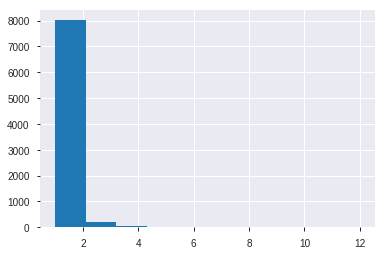

In [215]:
dis_plot_d = train[(train.dep_var == 1)]['client_id_num']
plt.hist(dis_plot_d)

оверфит

In [216]:
# # the same before with exact condition
# train[(train['client_id_num'] > 1)].groupby(['client_id_num','dep_var'])\
#     .agg({'dep_var' : 'count'})

In [217]:
'''num_0_1_client = train.groupby(['client_id','dep_var'])['dep_var'].count().to_dict()

        client_count_0_dv = train[(train.dep_var == 0)].groupby('client_id')['dep_var'].count().to_dict()

        client_count_1_dv = train[(train.dep_var == 1)].groupby('client_id')['dep_var'].count().to_dict()

        train['client_count_1_dv'] = train.client_id.apply(
            lambda x: client_count_1_dv[x] if x in client_count_1_dv.keys() else 0)

        train['client_count_0_dv'] = train.client_id.apply(
            lambda x: client_count_0_dv[x] if x in client_count_0_dv.keys() else 0)

        train11 = train

        cv_score11 = cv_meth(train11.drop(columns=['dep_var']),y,LGBMClassifier(n_estimators=30,max_depth=4))'''

"num_0_1_client = train.groupby(['client_id','dep_var'])['dep_var'].count().to_dict()\n\n        client_count_0_dv = train[(train.dep_var == 0)].groupby('client_id')['dep_var'].count().to_dict()\n\n        client_count_1_dv = train[(train.dep_var == 1)].groupby('client_id')['dep_var'].count().to_dict()\n\n        train['client_count_1_dv'] = train.client_id.apply(\n            lambda x: client_count_1_dv[x] if x in client_count_1_dv.keys() else 0)\n\n        train['client_count_0_dv'] = train.client_id.apply(\n            lambda x: client_count_0_dv[x] if x in client_count_0_dv.keys() else 0)\n\n        train11 = train\n\n        cv_score11 = cv_meth(train11.drop(columns=['dep_var']),y,LGBMClassifier(n_estimators=30,max_depth=4))"

train.var154

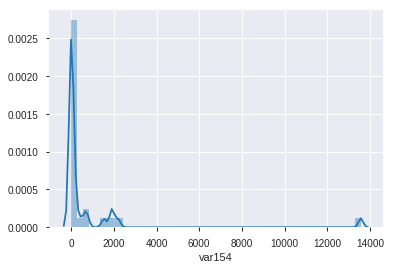

In [218]:
sns.distplot(train.var154.value_counts())

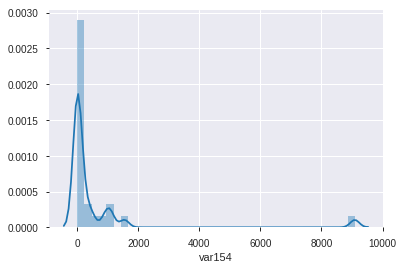

In [219]:
sns.distplot(train[train.dep_var == 0].var154.value_counts())

In [220]:
train[train.dep_var == 0].var154.value_counts()

 3     9093
 6     1550
 5     1100
 4     1055
 7      901
 10     480
 8      393
 9      257
 2      110
 12      69
 11      66
 1       22
-7       16
-11      13
-8       12
-5       11
 13      11
-12       4
-4        3
-2        3
-1        2
-3        2
 26       1
-6        1
-16       1
 14       1
Name: var154, dtype: int64

In [221]:
len(train.var154.unique())

31

In [222]:
train.var154

1         7
3         3
10        3
11        3
13        3
23        3
31        9
34        6
37        6
38        7
47       10
51        3
52        3
55        3
58        6
59        6
70        3
77       10
83        3
93        9
101       3
107       3
114       3
116       3
121       3
133       3
160       6
163       3
172       3
174       6
         ..
83661     5
83681     3
83700     3
83716     3
83718     3
83741     3
83766     3
83770     3
83788     4
83818     3
83820     7
83828     3
83830     3
83857     5
83874     3
83898     3
83905     3
83978     3
84002     3
84015     3
84022     3
84030     3
84032     3
84039     3
84048     3
84061     5
84066     3
84106     3
84121     3
84126     3
Name: var154, Length: 23490, dtype: int64

In [223]:
train.groupby(['var154','dep_var'])\
     .agg({'dep_var' : 'count'})

dep_var
var154 dep_var         
-19    1.0            1
-17    1.0            1
-16    0.0            1
-12    0.0            4
       1.0            3
-11    0.0           13
       1.0            7
-10    1.0            2
-8     0.0           12
       1.0           10
-7     0.0           16
       1.0            7
-6     0.0            1
       1.0            2
-5     0.0           11
       1.0            3
-4     0.0            3
-3     0.0            2
       1.0            1
-2     0.0            3
       1.0            2
-1     0.0            2
       1.0            2
 1     0.0           22
       1.0           20
 2     0.0          110
       1.0           76
 3     0.0         9093
       1.0         4477
 4     0.0         1055
       1.0          868
 5     0.0         1100
       1.0          800
 6     0.0         1550
       1.0          642
 7     0.0          901
       1.0          634
 8     0.0          393
       1.0          260
 9     0.0          257
       1.0          143
 10    0.0          480
       1.0          262
 11    0.0           66
       1.0           48
 12    0.0           69
       1.0           36
 13    0.0           11
       1.0            3
 14    0.0            1
 18    1.0            1
 25    1.0            1
 26    0.0            1
       1.0            1

In [224]:
def tr_ts_split(data,target):
    cv = KFold(random_state=17,n_splits=5,shuffle=True)
    for train_ind, val_ind in cv.split(data, target):
        X_train_ = data.iloc[train_ind]
        y_train_ = target.iloc[train_ind]
        X_val_ = data.iloc[val_ind]
        y_val_ = target.iloc[val_ind]
    return X_train_, y_train_, X_val_, y_val_

In [263]:
def make_prediction(data, w_0_feat,ind=True,clf=None):

    data = data.drop(columns=['test_cr_performance','test_cr_decision'])
    data.time_msw = pd.to_datetime(data.time_msw)
    data['start_time_s'] = data['time_msw'].apply(lambda ts: 
                                                          10000 * ts.hour + ts.minute*100 + ts.second).astype('int')
    data['month_verif'] = data['time_msw'].apply(lambda ts:ts.month).astype('int')
    data['hour'] = data['time_msw'].apply(lambda ts:ts.hour).astype('int')
    data = data.drop(columns=['time_msw'])
    data = data.drop(columns=['month_verif'])
    
    for v in top_var74:
        data['var74_' + str(v).replace(' ','')] = data['var74'].apply(lambda x: 1 if str(v) in str(x) else 0)
        
    client_id_val = data.client_id.value_counts().to_dict()
    data['client_id_num'] = data.client_id.apply(lambda x: client_id_val[x])
     
    object_feat = []
    for col in data.columns:
        if (data[col].dtypes == object):
            object_feat.append(col)
    data[object_feat] = data[object_feat].fillna('unknown')
    for i in object_feat:
        data[i] = pd.factorize(data[i])[0]

        
    data = data.drop(columns=['var46']);
    data = data.drop(columns=w_0_feat);
    
    for col in data.drop(columns=['dep_var']).columns:
        data[col] = data[col].fillna(data[col].median())
    
    if ind:
        ind = data[data.dep_var.isna() == False ].index
        train = data.loc[ind]
        valid = data.drop(index=ind)
        y_train = train.dep_var
    #     не определено
        y_val = valid.dep_var.values
        X_train = train.drop(columns=['dep_var'])
        X_val = valid.drop(columns=['dep_var'])
    else:
        X_train, y_train, X_val, y_val = tr_ts_split(data.drop(columns=['dep_var']),data.dep_var)
        
    ss = StandardScaler()
    scale_train_var41 = X_train.var41.values.reshape(-1, 1)
    scale_train_var41 = ss.fit_transform(scale_train_var41)
    
    scale_val_var41 = X_val.var41.values.reshape(-1, 1)
    scale_val_var41 = ss.transform(scale_val_var41)
    
    X_train.var41 = scale_train_var41
    X_val.var41 = scale_val_var41
    
    if clf==None:
        clf = LGBMClassifier(n_estimators=30,max_depth=4)
    else:
        clf = clf
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_val)
    
    return y_pred,y_val

In [239]:
y_pred,y_val = make_prediction(df,w_0_feat)
train = df.loc[ind]
ind_val = df[df.dep_var.isna() == True].index
valid = df.loc[ind_val]

In [243]:
valid.shape, len(y_pred)

((60640, 157), 60640)

In [244]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [245]:
valid.dep_var = y_pred

In [246]:
valid.dep_var.isna().any()

False

In [247]:
df = pd.concat([train,valid])

In [248]:
df.dep_var.isna().any()

False

(array([73751.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10379.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

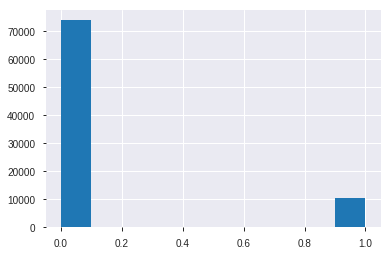

In [249]:
plt.hist(df.dep_var)

In [250]:
def make_pred(X,y,model):
    results = []
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=17)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return y_test, y_pred

In [251]:
def plot_conf_matrix(y_pred,y_test,title):
    plt.figure()
    grad_ens_conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='')
    plt.title(title)

In [252]:
data = df

In [253]:
y_pred,y_test = make_prediction(data,w_0_feat,False)

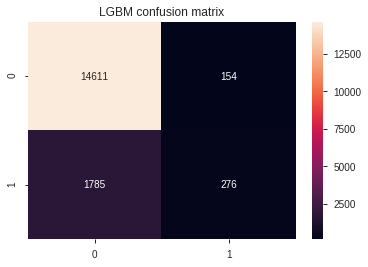

In [254]:
plot_conf_matrix(y_pred,y_test,'LGBM confusion matrix')

In [255]:
roc_auc = roc_auc_score(y_test,y_pred)
print('ROC-AUC =',roc_auc)

ROC-AUC = 0.5617427519247443


In [256]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

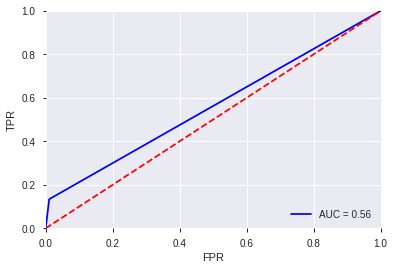

In [257]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()